In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf
from newsapi import NewsApiClient

import datetime
from datetime import datetime
from datetime import date, timedelta

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA

# Comprehensive Analysis for Bitcoin (BTC)

## 1. Introduction

Bitcoin (BTC) is the first and most well-known cryptocurrency, created by an anonymous person or group known as Satoshi Nakamoto in 2008 and in use from 2009. It operates on a decentralized network using blockchain technology and aims to serve as a digital alternative to traditional currencies.

### 1.2. Data colecting and market performance 


Historical Price Trends: Bitcoin's price has seen significant volatility since its inception, with notable peaks in December 2017 (around USD 20,000) and November 2021 (around USD 68,000). As of June 2024, Bitcoin's market capitalization is approximately $600 billion, making it the largest cryptocurrency by market cap.
Trading Volume: Daily trading volumes frequently exceed USD 20 billion, reflecting high liquidity and active trading.

In [2]:
# # Fetching Bitcoin historical data

# Set today's date
end_date = datetime.today().strftime('%Y-%m-%d')

# Fetching Bitcoin historical data
btc_data = yf.download('BTC-USD', start='2015-01-01', end=end_date)
btc_data.reset_index(inplace=True)

# Display the first few rows of Bitcoin data
print(btc_data.head())

# Fetching data for comparison (e.g., Ethereum)
eth_data = yf.download('ETH-USD', start='2015-01-01', end=end_date)
eth_data.reset_index(inplace=True)


[*********************100%%**********************]  1 of 1 completed


        Date        Open        High         Low       Close   Adj Close  \
0 2015-01-01  320.434998  320.434998  314.002991  314.248993  314.248993   
1 2015-01-02  314.079010  315.838989  313.565002  315.032013  315.032013   
2 2015-01-03  314.846008  315.149994  281.082001  281.082001  281.082001   
3 2015-01-04  281.145996  287.230011  257.612000  264.195007  264.195007   
4 2015-01-05  265.084015  278.341003  265.084015  274.473999  274.473999   

     Volume  
0   8036550  
1   7860650  
2  33054400  
3  55629100  
4  43962800  


[*********************100%%**********************]  1 of 1 completed


In [3]:
# Plotting closing price
plt.figure(figsize=(12, 6))
plt.plot(btc_data['Date'], btc_data['Close'], label='Closing Price')
plt.title('Bitcoin Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()



In [4]:
# Moving Average
btc_data['20_SMA'] = btc_data['Close'].rolling(window=20).mean()
btc_data['50_SMA'] = btc_data['Close'].rolling(window=50).mean()

plt.figure(figsize=(12, 6))
plt.plot(btc_data['Date'], btc_data['Close'], label='Closing Price')
plt.plot(btc_data['Date'], btc_data['20_SMA'], label='20-Day SMA', color='orange')
plt.plot(btc_data['Date'], btc_data['50_SMA'], label='50-Day SMA', color='magenta')
plt.title('Bitcoin Closing Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

## 2.Analysis of cryptocurenncy


### 2.1.Fundamental Analysis

*   Technology: Bitcoin uses a Proof of Work (PoW) consensus mechanism, where miners validate transactions and secure the network by solving complex mathematical problems. Bitcoin's development is overseen by a decentralized group of developers, with active contributions from the global community.
*  Scalability Solutions: The Lightning Network is a second-layer solution designed to enhance Bitcoin's transaction speed and reduce costs by enabling off-chain transactions.
*  Merchant Acceptance: Increasing numbers of merchants accept Bitcoin for goods and services, both online and offline.
*  Institutional Investment: Significant institutional investments from companies like MicroStrategy, Tesla, and various hedge funds have bolstered Bitcoin's legitimacy.
*  Hedge Against Inflation: Bitcoin is often seen as "digital gold" and a hedge against inflation due to its fixed supply of 21 million coins.

### 2.2.Sentiment Analysis 

Sentiment analysis is the process of analyzing digital text to determine if the emotional tone of the message is positive, negative, or neutral. Today, companies have large volumes of text data like emails, customer support chat transcripts, social media comments, and reviews.

*  Public Sentiment: Generally positive sentiment with high engagement on social media platforms like Twitter, Reddit, and specialized forums like Bitcointalk.
*  News Impact: Major news events, such as regulatory announcements, technological upgrades, and endorsements from influential figures, significantly influence Bitcoin's price and sentiment.

In [5]:
# Basic statistics
btc_data.describe()

# Volatility calculation
btc_data['Log_Returns'] = np.log(btc_data['Close'] / btc_data['Close'].shift(1))
volatility = btc_data['Log_Returns'].std() * np.sqrt(365)
print(f'Annualized Volatility: {volatility:.2%}')


Annualized Volatility: 70.72%


In [6]:
# Placeholder for sentiment analysis (data collection from social media/news is required)
# Init. News API credentials
newsapi = NewsApiClient(api_key='13eb229ebf4e4e2186e650cdb38a7493')

# Function to collect news articles using News API with pagination
def get_news_data(query, from_date, to_date, language='en', page_size=20, max_results=100):
    all_articles = []
    page = 1
    while len(all_articles) < max_results:
        try:
            articles = newsapi.get_everything(
                q=query, 
                from_param=from_date, 
                to=to_date, 
                language=language, 
                sort_by='relevancy', 
                page_size=page_size, 
                page=page
            )
            if not articles['articles']:
                break
            for article in articles['articles']:
                title = article['title'] or ''
                description = article['description'] or ''
                all_articles.append(title + " " + description)
                if len(all_articles) >= max_results:
                    break
            page += 1
        except Exception as e:
            print(f"Error fetching news articles: {e}")
            break
    return all_articles




In [7]:
# Collecting the new Bitcoins articles
   
today = date.today().strftime('%Y-%m-%d')
last_week = (date.today() - timedelta(days=7)).strftime('%Y-%m-%d')

# Assuming get_news_data is a function that fetches news articles
bitcoin_news = get_news_data('Bitcoin', last_week, today)

# Check if news articles were fetched successfully
if bitcoin_news:
    print(f"Fetched {len(bitcoin_news)} news articles.")
    
    # Perform sentiment analysis
    analyzer = SentimentIntensityAnalyzer()
    news_sentiments = [analyzer.polarity_scores(article) for article in bitcoin_news]

    # Convert sentiment data to DataFrame and include the articles
    news_df = pd.DataFrame(news_sentiments)
    news_df['article'] = bitcoin_news
else:
    news_df = pd.DataFrame()
    print("No news articles fetched.")


Fetched 100 news articles.


In [8]:
# Display the first few rows of the dataframe if there are any articles
if not news_df.empty:
    display(news_df.head())
else:
    print("No news articles to display.")

neg    neu    pos  compound  \
0  0.000  0.955  0.045    0.3182   
1  0.058  0.921  0.020   -0.4696   
2  0.104  0.896  0.000   -0.5719   
3  0.140  0.810  0.050   -0.6046   
4  0.000  1.000  0.000    0.0000   

                                             article  
0  VanEck Set to Launch Spot Bitcoin ETF on Austr...  
1  Why Should You Invest in This Learn-to-Earn Bi...  
2  Elderly Texas woman withdrew $40K from bank fo...  
3  Did Altcoin Hunters Miss Meme Coin Season? KAI...  
4  MicroStrategy raises its bond sale to buy even...

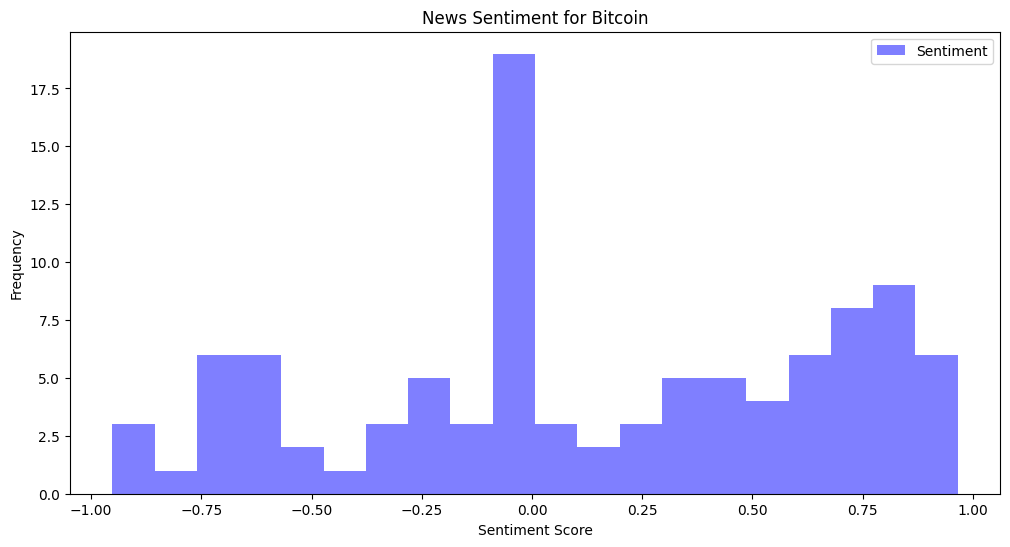

In [9]:
def plot_sentiment(sentiments, title):
    plt.figure(figsize=(12, 6))
    plt.hist([sent['compound'] for sent in sentiments], bins=20, alpha=0.5, color='blue', label='Sentiment')
    plt.title(title)
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Plot News Sentiment for Bitcoin
if bitcoin_news:
    plot_sentiment(news_sentiments, 'News Sentiment for Bitcoin')


In [10]:

# Plotting Bitcoin vs Ethereum
plt.figure(figsize=(12, 6))
plt.plot(btc_data['Date'], btc_data['Close'], label='Bitcoin')
plt.plot(eth_data['Date'], eth_data['Close'], label='Ethereum', color='green')
plt.title('Bitcoin vs Ethereum Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


## 3.Detailed risk assessment
Cryptocurrencies have carried plenty of risk and risk management concern since the first digital currency,Bitcoin, was introduced to the public. The original perceived exposures might be loosely characterized as speculative risks, not something a traditional insurer might worry about.The original intention of Bitcoin was to create a means of peer-to-peer exchange, effectively skirting if not disruptingtraditional banking and financial networks. But a decade later, thousands of other cryptocurrencies have been created, each of which has varying degrees of consumer security and often experience volatile price fluctuations.


Annualized Volatility: 58.31%


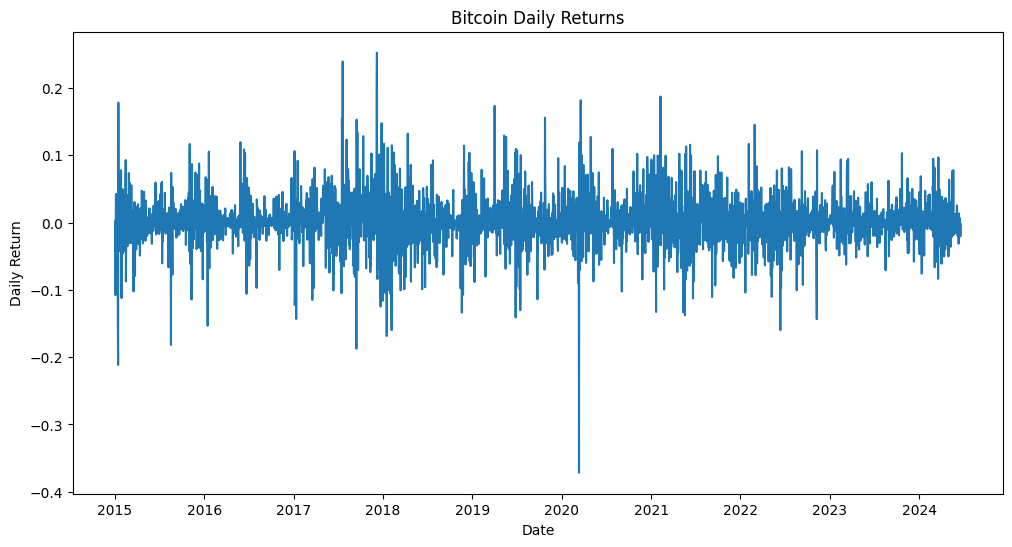

In [12]:
# Market Volatility Analysis
# Calculate daily returns
btc_data['Daily_Return'] = btc_data['Adj Close'].pct_change()

# Calculate annualized volatility
volatility = btc_data['Daily_Return'].std() * np.sqrt(252)
print(f'Annualized Volatility: {volatility:.2%}')

# Plot daily returns
plt.figure(figsize=(12, 6))
plt.plot(btc_data['Date'], btc_data['Daily_Return'])
plt.title('Bitcoin Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()


In [13]:
# Liquidity risk analysis
# Calculate trading volume statistics
volume_mean = btc_data['Volume'].mean()
volume_std = btc_data['Volume'].std()
volume_min = btc_data['Volume'].min()
volume_max = btc_data['Volume'].max()



In [14]:
# Printing Trading Volume statistics
print(f'Average Daily Trading Volume: {volume_mean:.2f} BTC')
print(f'Standard Deviation of Daily Trading Volume: {volume_std:.2f} BTC')
print(f'Minimum Daily Trading Volume: {volume_min:.2f} BTC')
print(f'Maximum Daily Trading Volume: {volume_max:.2f} BTC')



Average Daily Trading Volume: 17820848964.48 BTC
Standard Deviation of Daily Trading Volume: 19251760326.66 BTC
Minimum Daily Trading Volume: 7860650.00 BTC
Maximum Daily Trading Volume: 350967941479.00 BTC


<function matplotlib.pyplot.show(close=None, block=None)>

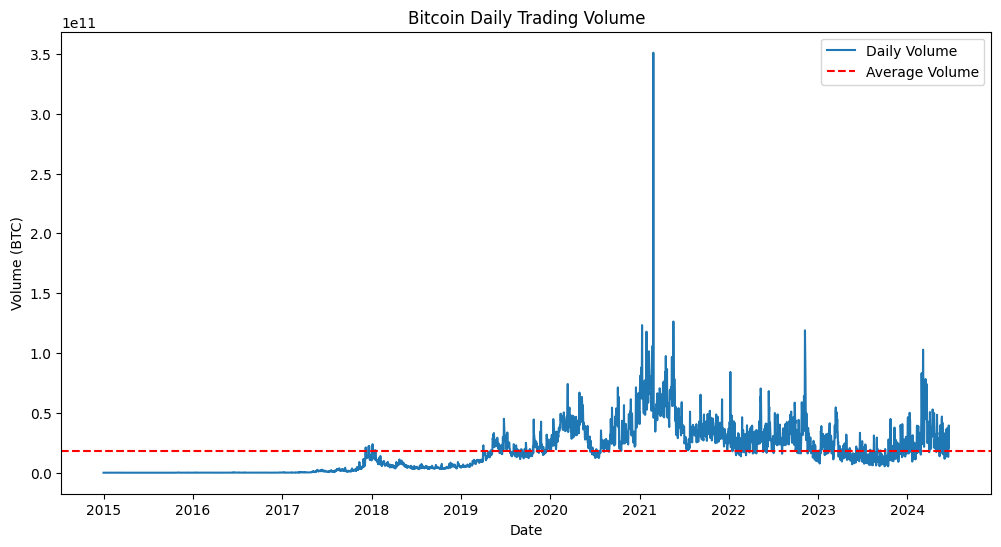

In [15]:
# Ploting trading volume statistics
plt.figure(figsize=(12, 6))
plt.plot(btc_data['Date'], btc_data['Volume'], label='Daily Volume')
plt.axhline(volume_mean, color='r', linestyle='--', label='Average Volume')
plt.title('Bitcoin Daily Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume (BTC)')
plt.legend()
plt.show




In [16]:
# Calculate moving averages
btc_data['20_SMA'] = btc_data['Adj Close'].rolling(window=20).mean()
btc_data['50_SMA'] = btc_data['Adj Close'].rolling(window=50).mean()
btc_data['200_SMA'] = btc_data['Adj Close'].rolling(window=200).mean()

# Plot moving averages
plt.figure(figsize=(12, 6))
plt.plot(btc_data['Date'], btc_data['Adj Close'], label='Adjusted Close Price')
plt.plot(btc_data['Date'], btc_data['20_SMA'], label='20-Day SMA', color='orange')
plt.plot(btc_data['Date'], btc_data['50_SMA'], label='50-Day SMA', color='magenta')
plt.plot(btc_data['Date'], btc_data['200_SMA'], label='200-Day SMA', color='green')
plt.title('Bitcoin Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

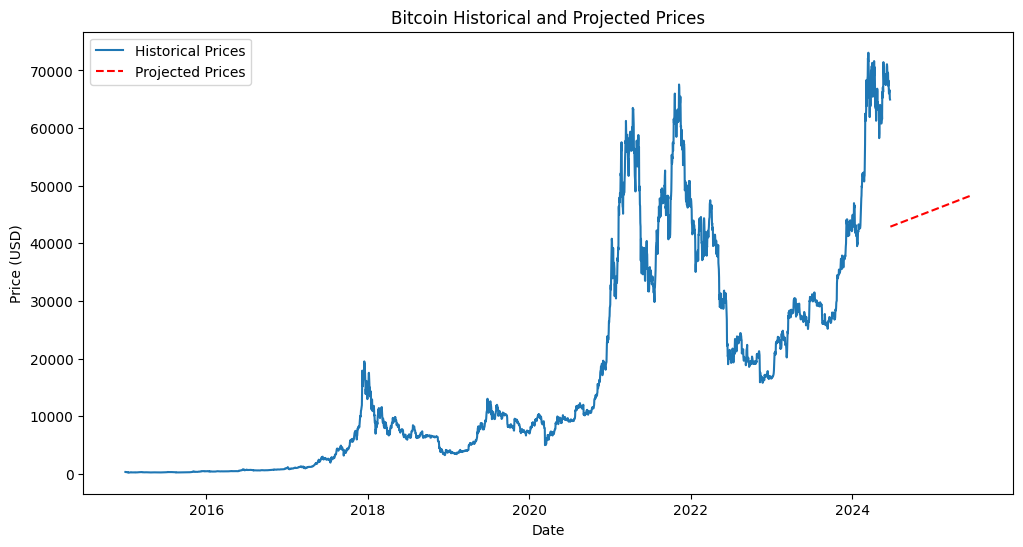

In [17]:
# Prepare data for linear regression
btc_data['Date_ordinal'] = pd.to_datetime(btc_data['Date']).map(datetime.toordinal)
X = btc_data['Date_ordinal'].values.reshape(-1, 1)
y = btc_data['Adj Close'].values

# Train the model
model = LinearRegression()
model.fit(X, y)

# Project future dates
future_dates = pd.date_range(start=datetime.today(), periods=365).to_pydatetime()
future_dates_ordinal = [date.toordinal() for date in future_dates]
future_prices = model.predict(np.array(future_dates_ordinal).reshape(-1, 1))

# Plot historical and projected prices
plt.figure(figsize=(12, 6))
plt.plot(btc_data['Date'], btc_data['Adj Close'], label='Historical Prices')
plt.plot(future_dates, future_prices, label='Projected Prices', linestyle='--', color='red')
plt.title('Bitcoin Historical and Projected Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


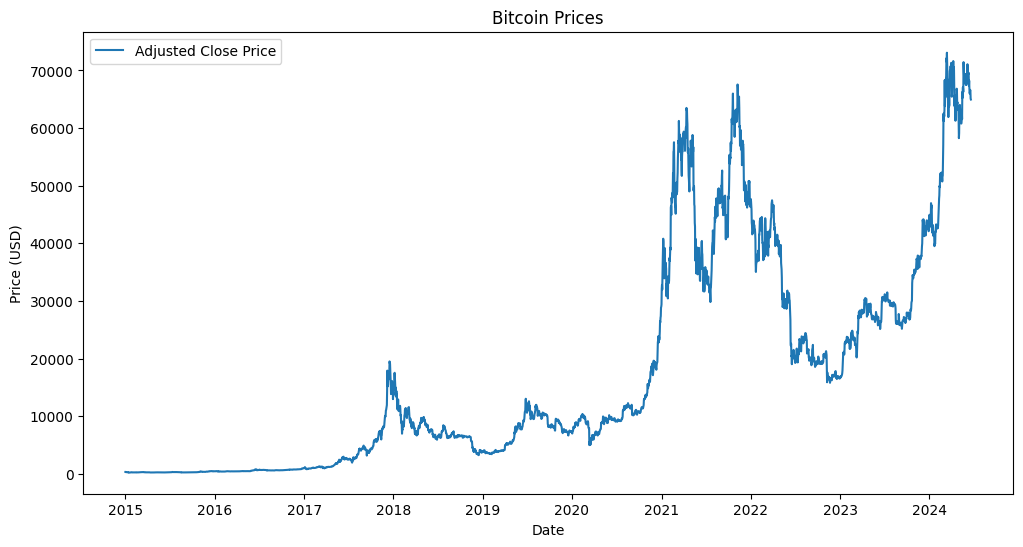

In [18]:
# Use the 'Adj Close' column for modeling
btc_prices = btc_data[['Date', 'Adj Close']]
btc_prices.set_index('Date', inplace=True)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(btc_prices, label='Adjusted Close Price')
plt.title('Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [19]:
# Fit the ARIMA model
model = ARIMA(btc_prices, order=(5, 1, 0))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


/home/user/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/user/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/user/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 3458
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -28288.125
Date:                Thu, 20 Jun 2024   AIC                          56588.250
Time:                        11:30:11   BIC                          56625.139
Sample:                    01-01-2015   HQIC                         56601.424
                         - 06-19-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0553      0.009     -6.432      0.000      -0.072      -0.038
ar.L2          0.0108      0.009      1.189      0.234      -0.007       0.029
ar.L3          0.0307      0.010      3.104      0.0

## 4.Forecast future prices 
This Bitcoin price analysis indicates that its value will increase by 14.21% and reach $74,156 by June 20, 2024.

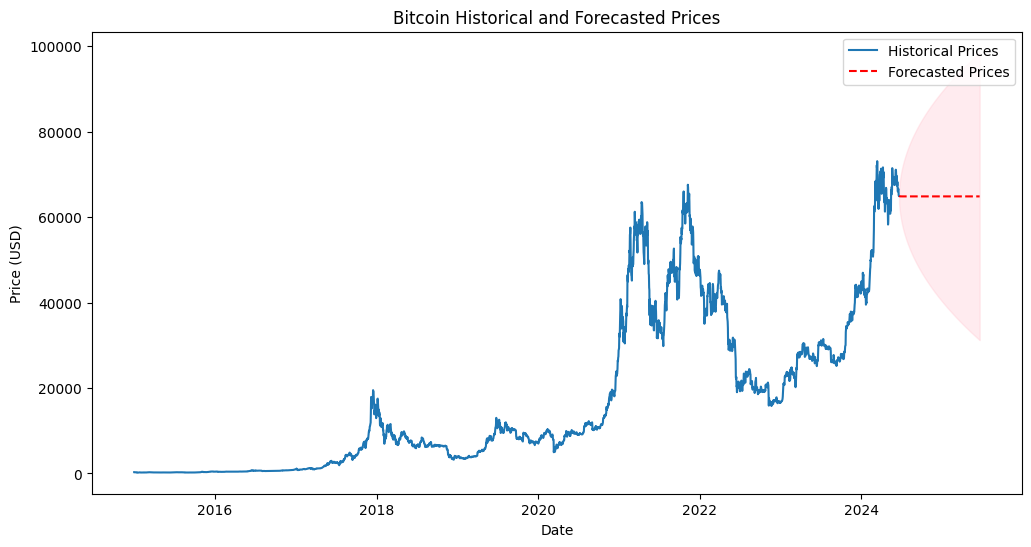

In [20]:
# Forecast future prices
forecast_steps = 365  # Forecast for the next 365 days
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Create a date range for the forecast
forecast_dates = pd.date_range(start=btc_prices.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)

# Create a DataFrame to hold the forecast
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': forecast_values, 'Lower CI': conf_int.iloc[:, 0], 'Upper CI': conf_int.iloc[:, 1]})
forecast_df.set_index('Date', inplace=True)

# Plot historical and forecasted prices
plt.figure(figsize=(12, 6))
plt.plot(btc_prices, label='Historical Prices')
plt.plot(forecast_df['Forecast'], label='Forecasted Prices', linestyle='--', color='red')
plt.fill_between(forecast_df.index, forecast_df['Lower CI'], forecast_df['Upper CI'], color='pink', alpha=0.3)
plt.title('Bitcoin Historical and Forecasted Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()



In [21]:
# Summarizing the analysis
print("Bitcoin remains a dominant cryptocurrency with robust market performance and strong future potential. However, it comes with inherent risks such as high volatility and regulatory uncertainties.")


Bitcoin remains a dominant cryptocurrency with robust market performance and strong future potential. However, it comes with inherent risks such as high volatility and regulatory uncertainties.


## 5.References
#### Technical Analysis and the Profitability of Trading Rules in the Bitcoin Market by Urquhart, A. (2016)
#### Bitcoin Price Prediction Using Sentiment Analysis and Empirical Mode Decomposition by Serdar Arslan(30.05.2024)
#### BITCOIN – HEDGE OR SPECULATIVE ASSET: ANALYSIS OF ITS ROLE AND NATURE by Svetoslav Borisov Volume 33(5), 2024
#### Forecasting volatility of Bitcoin at: https://www.researchgate.net/publication/354648039



